#### !!IMPORTANTE INSTALAR¡¡¡

- pip install googletrans==4.0.0-rc1
- pip install geodatasets
- python -m pip install geopandas
- python -m pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
# Cargar el dataset del Titanic (puedes cambiar la ruta si tienes el archivo localmente)
vid = "../data/KRvideos_cc50_202101.csv"
df = pd.read_csv(vid)

# Visualizar las primeras filas
print(df.head())

      video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0      17.14.11            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U      17.14.11  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80      17.14.11  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI      17.14.11     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id     publish_time  \
0         22.0  13/11/2017 2:07   
1         25.0  13/11/2017 5:59   
2         22.0  11/11/2017 2:16   
3         25.0  12/11/2017 6:19   
4         25.0  13/11/2017 6:08   

                                                tags     views   likes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130.0  1422.0   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533.0   211.0   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"|"공연"  421409.0  5112.0   
3  이명박|"이명박 출국금지"|"이명박 출국현장"|"이명박 바레인"|"이명박 대통령"

In [3]:
# Información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36897 entries, 0 to 36896
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                36741 non-null  object 
 1   trending_date           34730 non-null  object 
 2   title                   34592 non-null  object 
 3   channel_title           34575 non-null  object 
 4   category_id             34567 non-null  float64
 5   publish_time            34567 non-null  object 
 6   tags                    34568 non-null  object 
 7   views                   34567 non-null  float64
 8   likes                   34567 non-null  float64
 9   dislikes                34567 non-null  float64
 10  comment_count           34567 non-null  float64
 11  thumbnail_link          34568 non-null  object 
 12  comments_disabled       34567 non-null  object 
 13  ratings_disabled        34567 non-null  object 
 14  video_error_or_removed  34567 non-null

## CANTIDAD DE DATOS

In [4]:
len(df)

36897

## VERIFICAR VALORES NULOS POR COLUMNA

In [5]:
# Verificar valores nulos por columna
missing_values = df.isnull().sum()
print(missing_values)

# Porcentaje de valores nulos
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

video_id                   156
trending_date             2167
title                     2305
channel_title             2322
category_id               2330
publish_time              2330
tags                      2329
views                     2330
likes                     2330
dislikes                  2330
comment_count             2330
thumbnail_link            2329
comments_disabled         2330
ratings_disabled          2330
video_error_or_removed    2330
description               5493
state                        0
lat                          0
lon                          0
geometry                     0
dtype: int64
video_id                   0.422799
trending_date              5.873106
title                      6.247120
channel_title              6.293195
category_id                6.314877
publish_time               6.314877
tags                       6.312166
views                      6.314877
likes                      6.314877
dislikes                   6.314877
comment

## TRATAMIENTO DE VALORES DUPLICADOS

In [6]:
# Verificar si hay duplicados
duplicates = df.duplicated().sum()
print(f'Duplicados: {duplicates}')

# Eliminar duplicados si es necesario
#df = df.drop_duplicates()

Duplicados: 1291


## TRATAMIENTO DE VALORES NULOS

In [7]:
# Para imputar con la mediana
df['views'] = df['views'].fillna(df['views'].median())
df['likes'] = df['likes'].fillna(df['likes'].median())
df['dislikes'] = df['dislikes'].fillna(df['dislikes'].median())
df['comment_count'] = df['comment_count'].fillna(df['comment_count'].median())

# Para imputar con la moda
df['video_id'] = df['video_id'].fillna(df['video_id'].mode()[0])
df['trending_date'] = df['trending_date'].fillna(df['trending_date'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])
df['channel_title'] = df['channel_title'].fillna(df['channel_title'].mode()[0])
df['category_id'] = df['category_id'].fillna(df['category_id'].mode()[0])
df['publish_time'] = df['publish_time'].fillna(df['publish_time'].mode()[0])
df['tags'] = df['tags'].fillna(df['tags'].mode()[0])
df['thumbnail_link'] = df['thumbnail_link'].fillna(df['thumbnail_link'].mode()[0])
df['comments_disabled'] = df['comments_disabled'].fillna(df['comments_disabled'].mode()[0])
df['ratings_disabled'] = df['ratings_disabled'].fillna(df['ratings_disabled'].mode()[0])
df['video_error_or_removed'] = df['video_error_or_removed'].fillna(df['video_error_or_removed'].mode()[0])
df['description'] = df['description'].fillna(df['description'].mode()[0])

# Eliminar la columna 'Cabin' por tener demasiados valores nulos
#df.drop('Cabin', axis=1, inplace=True)

# Verificar nuevamente los valores nulos
print(df.isnull().sum())

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
state                     0
lat                       0
lon                       0
geometry                  0
dtype: int64


In [8]:
len(df)

36897

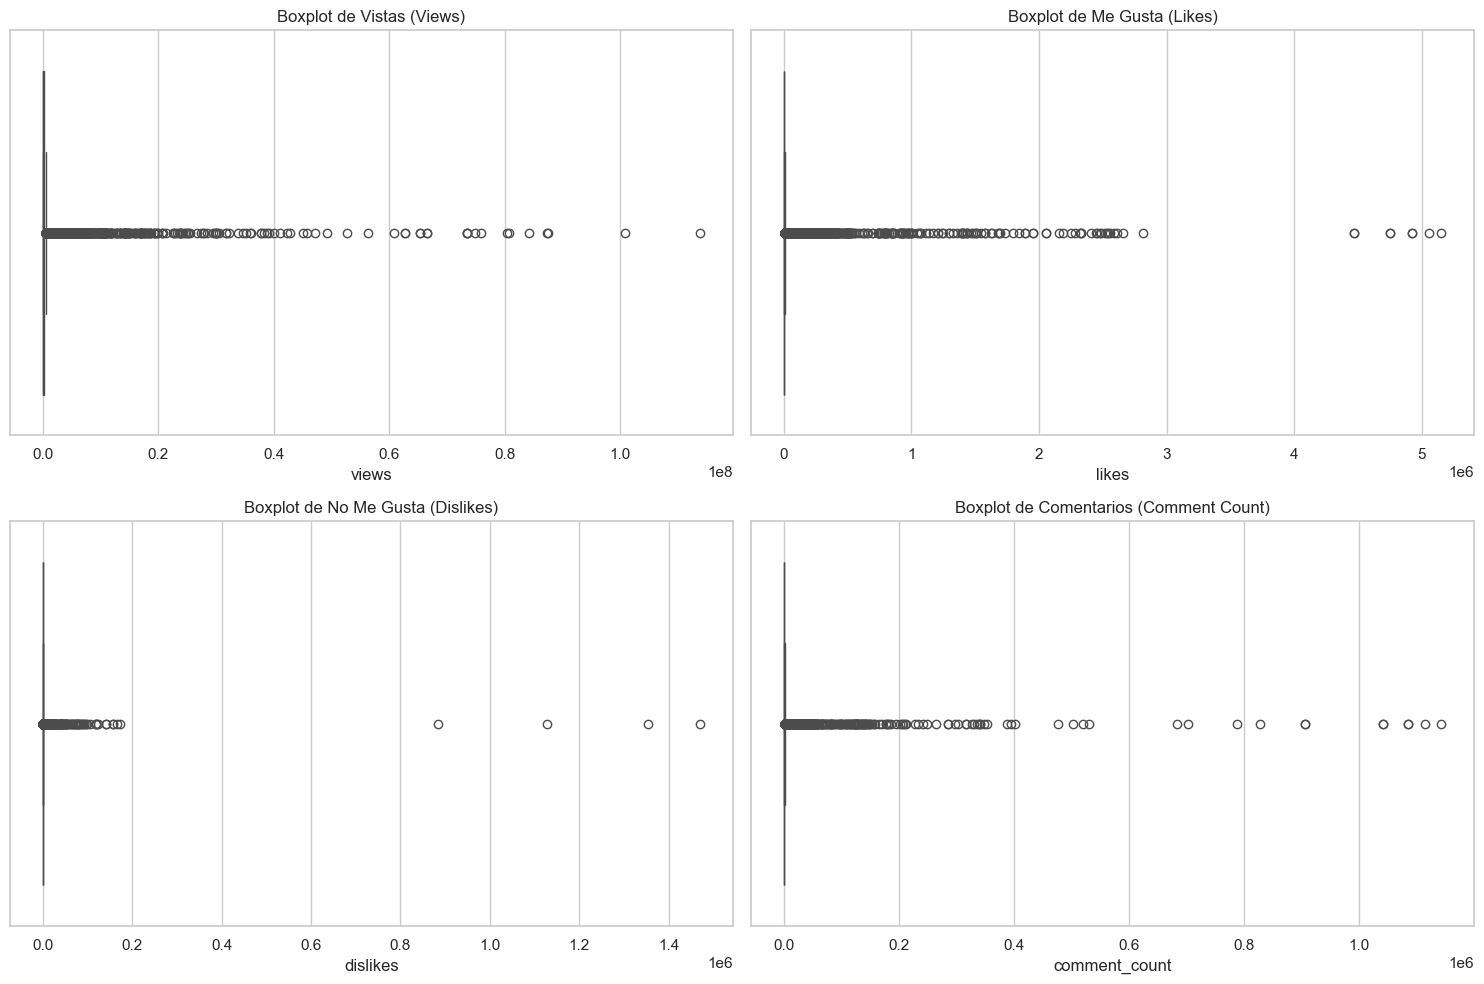

In [9]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear boxplots para identificar valores atípicos
plt.figure(figsize=(15, 10))

# Boxplot para 'views'
plt.subplot(2, 2, 1)
sns.boxplot(x=df['views'])
plt.title('Boxplot de Vistas (Views)')

# Boxplot para 'likes'
plt.subplot(2, 2, 2)
sns.boxplot(x=df['likes'])
plt.title('Boxplot de Me Gusta (Likes)')

# Boxplot para 'dislikes'
plt.subplot(2, 2, 3)
sns.boxplot(x=df['dislikes'])
plt.title('Boxplot de No Me Gusta (Dislikes)')

# Boxplot para 'comment_count'
plt.subplot(2, 2, 4)
sns.boxplot(x=df['comment_count'])
plt.title('Boxplot de Comentarios (Comment Count)')

plt.tight_layout()
plt.show()

## VERIFICANDO VALORES ATIPICOS

In [10]:
class OutlierHandler:
    def __init__(self, df):
        self.df = df

    def _calculate_iqr_bounds(self, column):
        Q1 = self.df[column].quantile(0.25)
        Q3 = self.df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return lower_bound, upper_bound

    def find_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        return outliers

    def count_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        outliers = self.df[(self.df[column] < lower_bound) | (self.df[column] > upper_bound)]
        outliers_count = outliers.shape[0]
        total_count = self.df.shape[0]
        percentage_outliers = (outliers_count / total_count) * 100
        return outliers_count, percentage_outliers

    def replace_outliers_iqr(self, column):
        lower_bound, upper_bound = self._calculate_iqr_bounds(column)
        median = self.df[column].median()
        # Aplicar reemplazo de valores atípicos por la mediana
        self.df[column] = self.df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
        return self.df


In [11]:
outlier_handler = OutlierHandler(df)

In [12]:
# Aplicar el método a las columnas relevantes para encontrar valores atípicos
outliers_views = outlier_handler.find_outliers_iqr('views')
outliers_likes = outlier_handler.find_outliers_iqr('likes')
outliers_dislikes = outlier_handler.find_outliers_iqr('dislikes')
outliers_comment_count = outlier_handler.find_outliers_iqr('comment_count')

# Imprimir resultados
print("Outliers in 'views':")
print(outliers_views)

print("\nOutliers in 'likes':")
print(outliers_likes)

print("\nOutliers in 'dislikes':")
print(outliers_dislikes)

print("\nOutliers in 'comment_count':")
print(outliers_comment_count)

Outliers in 'views':
          video_id trending_date  \
11     9dQ02l7YlQI      17.14.11   
14     o4_tHTmniw4      17.14.11   
59     zOOmEDwPJX0      17.14.11   
65     7MxiQ4v0EnE      17.14.11   
66     QLOT92uIITo      17.14.11   
...            ...           ...   
36823  sJL2bcZ9L30      18.14.06   
36849       #NAME?      18.14.06   
36856  2L7bZ2Mkz28      18.14.06   
36879  LbSU1_SG91w      18.14.06   
36888  uHHe9aGGppU      18.14.06   

                                                   title  \
11     우리가 원했던 경기력 !!! 손흥민 멀티골, 기성용 탈압박 ● 대한민국 vs 콜롬비...   
14         WannaOne (워너원) - 'Beautiful' M/V (Movie ver.)   
59     Jannat (Full Song) Aatish - Latest Punjabi Son...   
65     Daang ( Full Video ) | Mankirt Aulakh | Sukh S...   
66     Saada Time | Dhira Gill | Maha Film | Full Vid...   
...                                                  ...   
36823                     백종원이 '뚝섬 골목 식당'에서 분노 폭발한 이후 상황   
36849                      Dumbo Official Teaser Trailer   
36856 

## CANTIDAD DE ATIPICOS

In [13]:
# Aplicar el método a las columnas relevantes y sumar los resultados
columns = ['views', 'likes', 'dislikes', 'comment_count']
total_outliers = 0
total_percentage = 0

for column in columns:
    outliers_count, percentage_outliers = outlier_handler.count_outliers_iqr(column)  # Uso del método de la clase
    total_outliers += outliers_count
    total_percentage += percentage_outliers
    print(f"Columna: {column} - Valores atípicos: {outliers_count} ({percentage_outliers:.2f}%)")

# Mostrar los resultados totales
print(f"\nValores atípicos totales: {total_outliers}")
print(f"Porcentaje total de valores atípicos: {total_percentage / len(columns):.2f}%")

Columna: views - Valores atípicos: 4190 (11.36%)
Columna: likes - Valores atípicos: 3892 (10.55%)
Columna: dislikes - Valores atípicos: 4357 (11.81%)
Columna: comment_count - Valores atípicos: 4015 (10.88%)

Valores atípicos totales: 16454
Porcentaje total de valores atípicos: 11.15%


## TRATAMIENTO DE VALORES ATIPICOS

In [14]:
# Aplicar el método a las columnas relevantes para reemplazar valores atípicos
df_replaced_views = outlier_handler.replace_outliers_iqr('views')
df_replaced_likes = outlier_handler.replace_outliers_iqr('likes')
df_replaced_dislikes = outlier_handler.replace_outliers_iqr('dislikes')
df_replaced_comment_count = outlier_handler.replace_outliers_iqr('comment_count')

# Mostrar el dataframe con los valores reemplazados (a modo de ejemplo, puedes imprimir uno de ellos)
print(df_replaced_views)

          video_id trending_date                                  title  \
0      RxGQe4EeEpA      17.14.11                     좋아 by 민서_윤종신_좋니 답가   
1      hH7wVE8OlQ0      17.14.11                       JSA 귀순 북한군 총격 부상   
2      9V8bnWUmE9U      17.14.11             나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)   
3      0_8py-t5R80      17.14.11             이명박 출국 현장, 놓치면 안되는 장면   
4      bk55RbxiQdI      17.14.11                김장겸은 물러갔다 MBC 노조 환호와 눈물   
...            ...           ...                                    ...   
36892  pj6YBBrO1sQ      18.14.06             장모님 가게한다고 1억만 달라는 아내 사이다카톡   
36893  _Ne9ER-jr20      18.14.06        여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러]   
36894  xuOQq_fzEjk      18.14.06                     2018년 6월 13일 아침 뉴스   
36895  uXvjxeg08eQ      18.14.06          워너원 웃음 참기 영상 워너원 GO X-con.ver   
36896  C-bLqIftDY4      18.14.06  [법륜스님의 즉문즉설 제 1398회] 시동생의 아이를 키우게 됐어요   

          channel_title  category_id      publish_time  \
0                라푸마코리아         22.0   13

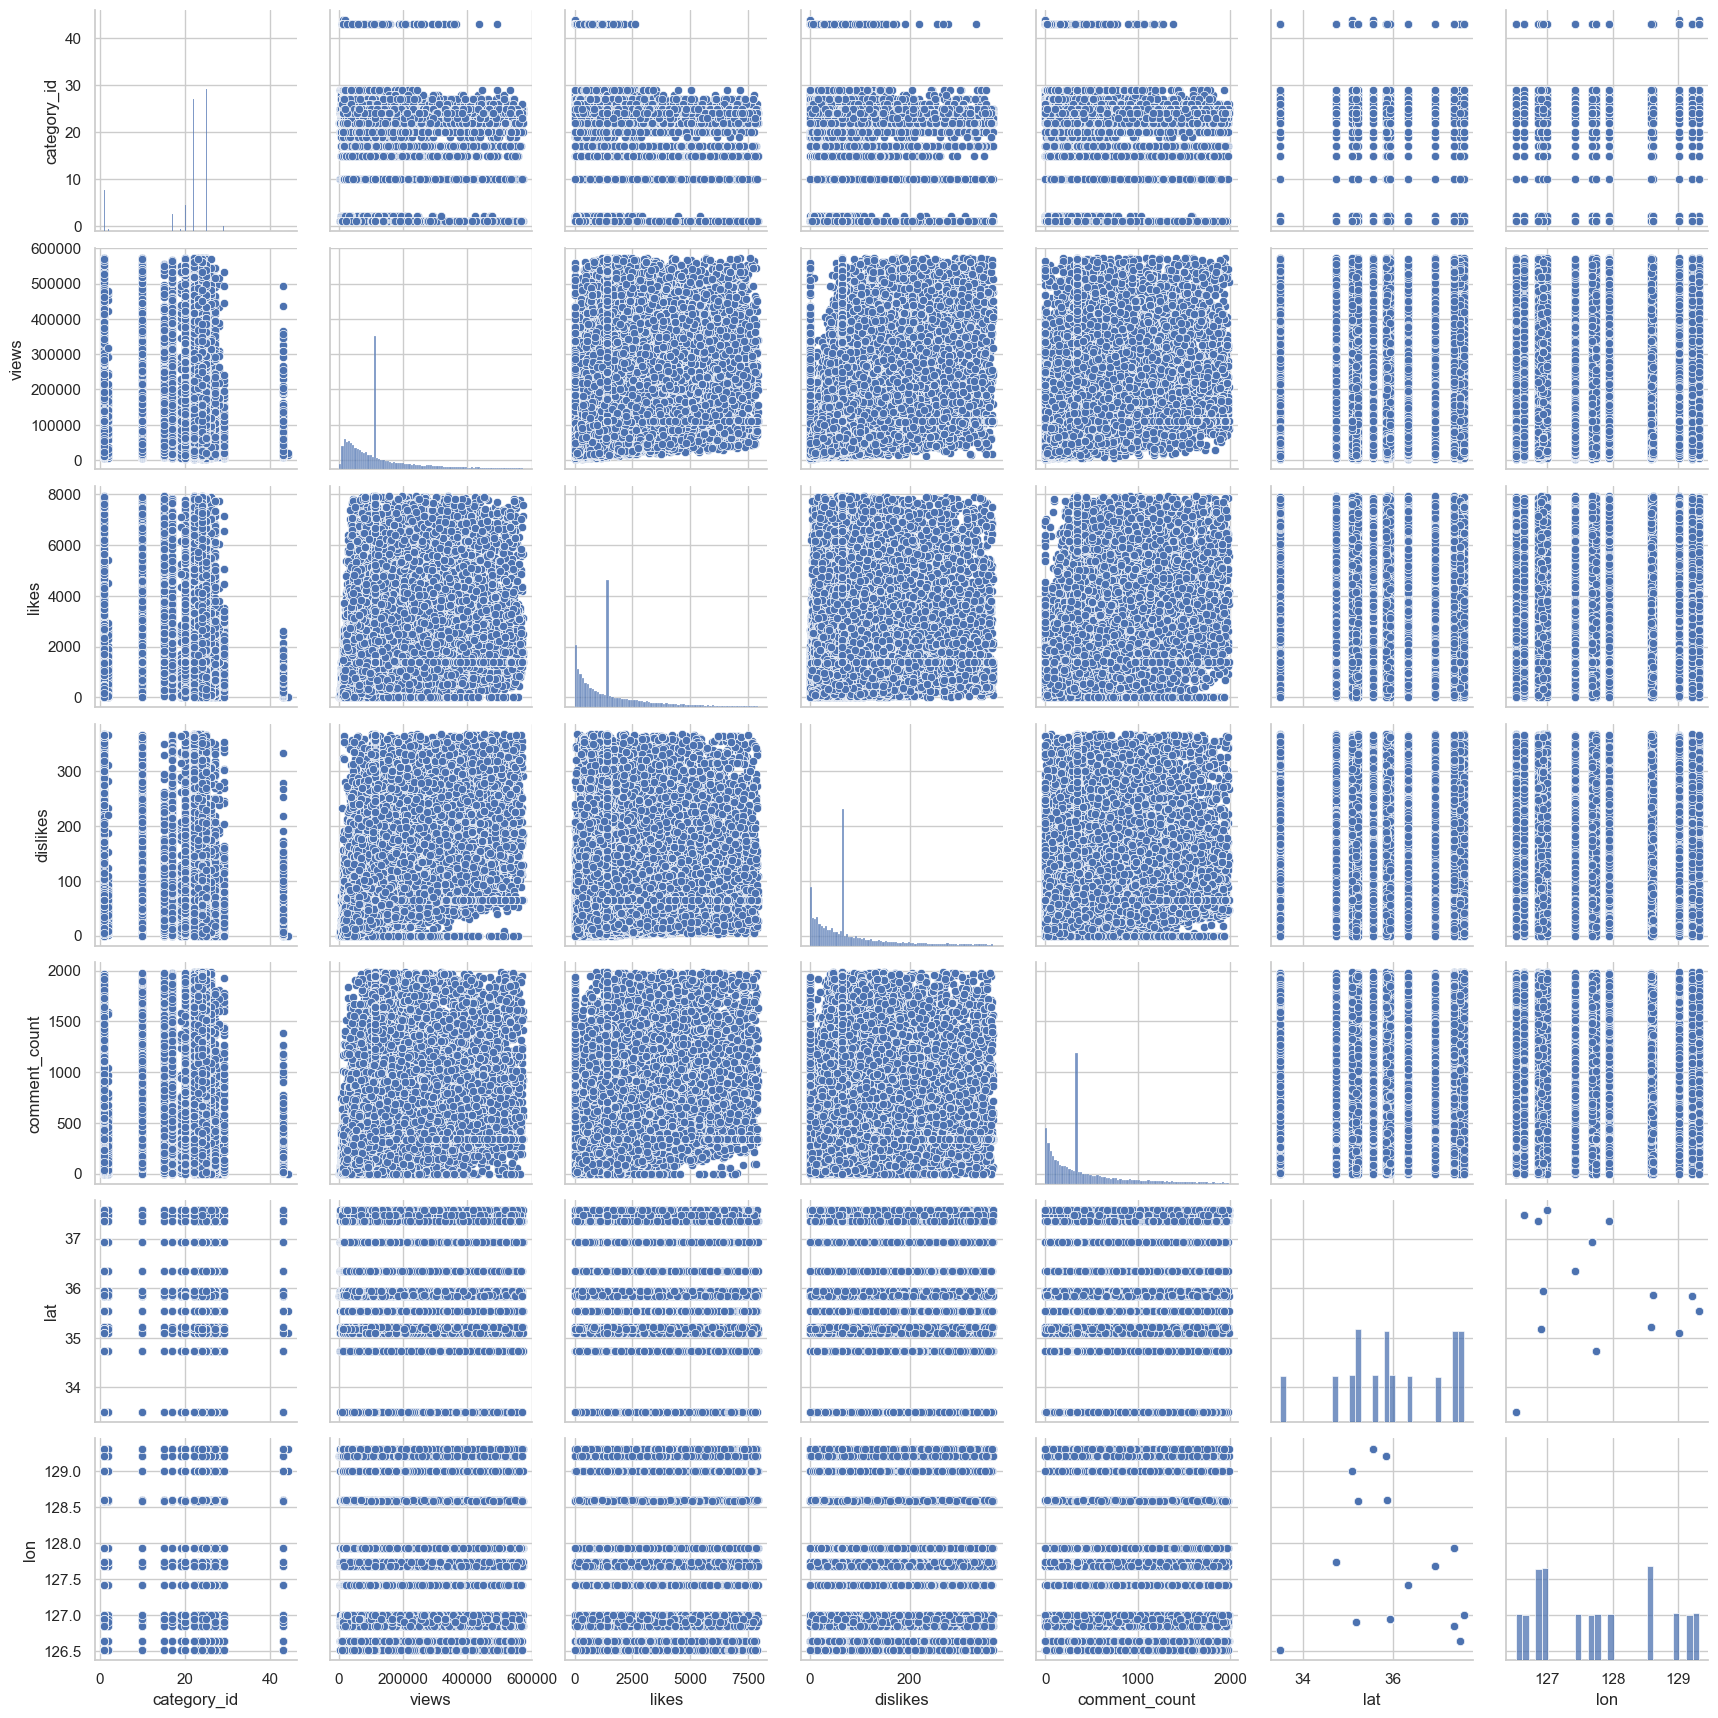

In [15]:
sns.pairplot(df)

## CARGA DE ARCHIVO JSON 

In [16]:
# Abrir y leer el archivo JSON
with open('../data/KR_category_id.json', 'r') as file:
    data = json.load(file)  # Cargar el contenido del archivo en un diccionario o lista de Python

# Mostrar el contenido
print(data)

{'kind': 'youtube#videoCategoryListResponse', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"', 'items': [{'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}, {'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}, {'kind': 'yout

In [17]:
dfjson = pd.DataFrame(data)
dfjson.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [18]:
dfjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    31 non-null     object
 1   etag    31 non-null     object
 2   items   31 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes


In [19]:
# Crear un diccionario para mapear los IDs con los nombres de las categorías
category_mapping = {int(item['id']): item['snippet']['title'] for item in data['items'] if item['snippet']['assignable']}

# Agregar una columna con el nombre de la categoría en el DataFrame principal
df['category_name'] = df['category_id'].map(category_mapping)

### 1. ¿Qué categorías de videos son las de mayor tendencia?

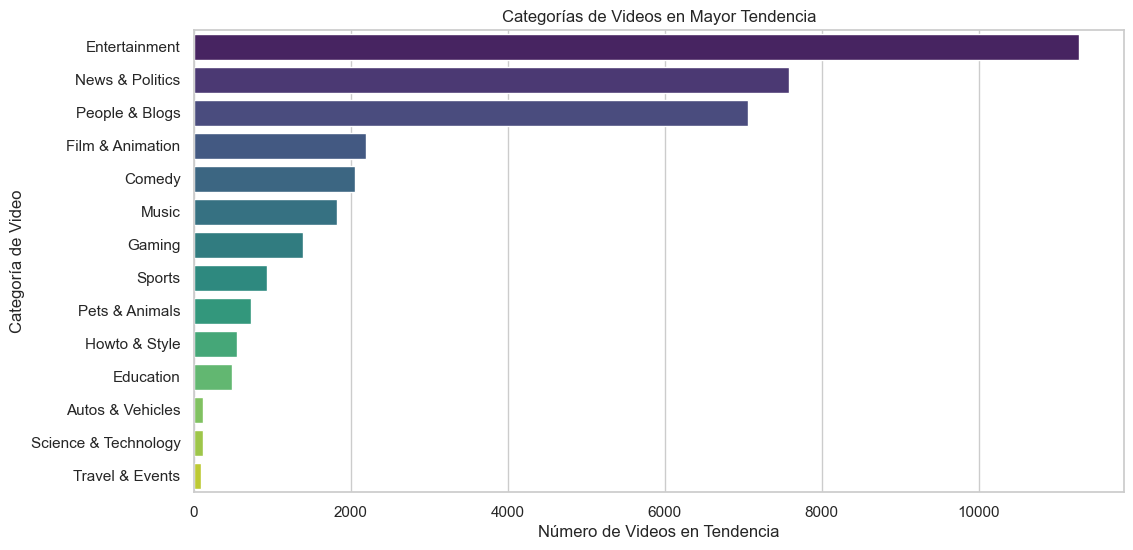

In [ ]:
category_trending_count = df['category_name'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_trending_count.values, y=category_trending_count.index, hue=category_trending_count.index, dodge=False, palette="viridis", legend=False)
plt.title("Categorías de Videos en Mayor Tendencia")
plt.xlabel("Número de Videos en Tendencia")
plt.ylabel("Categoría de Video")
plt.show()

### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

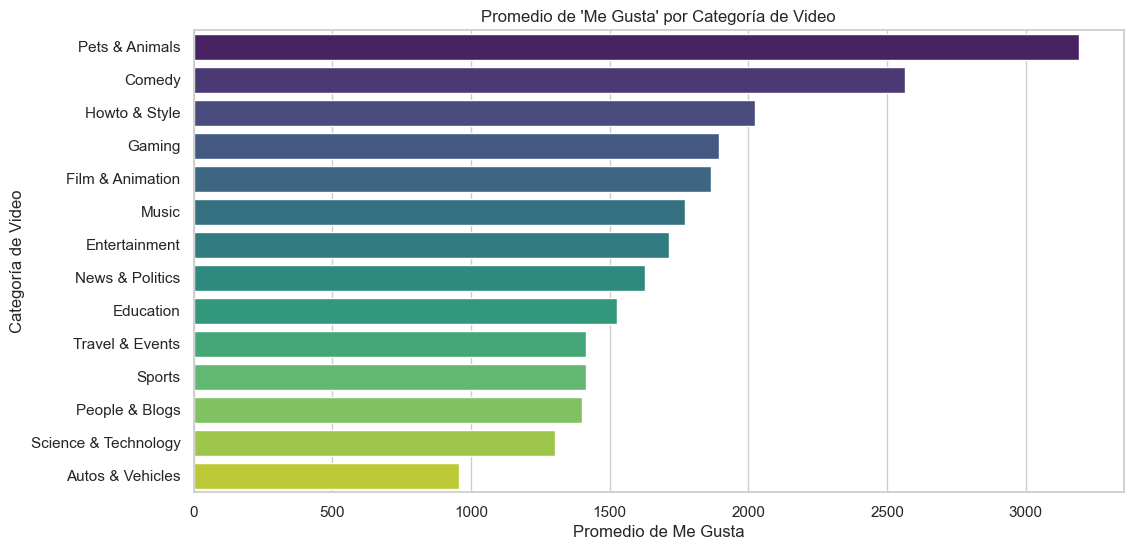

In [ ]:
avg_likes_by_category = df.groupby('category_name')['likes'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_likes_by_category.values, y=avg_likes_by_category.index, hue=avg_likes_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Promedio de 'Me Gusta' por Categoría de Video")
plt.xlabel("Promedio de Me Gusta")
plt.ylabel("Categoría de Video")
plt.show()

### 3. ¿Qué categorías de videos tienen la mejor proporción de “Me gusta” / “No me gusta”?

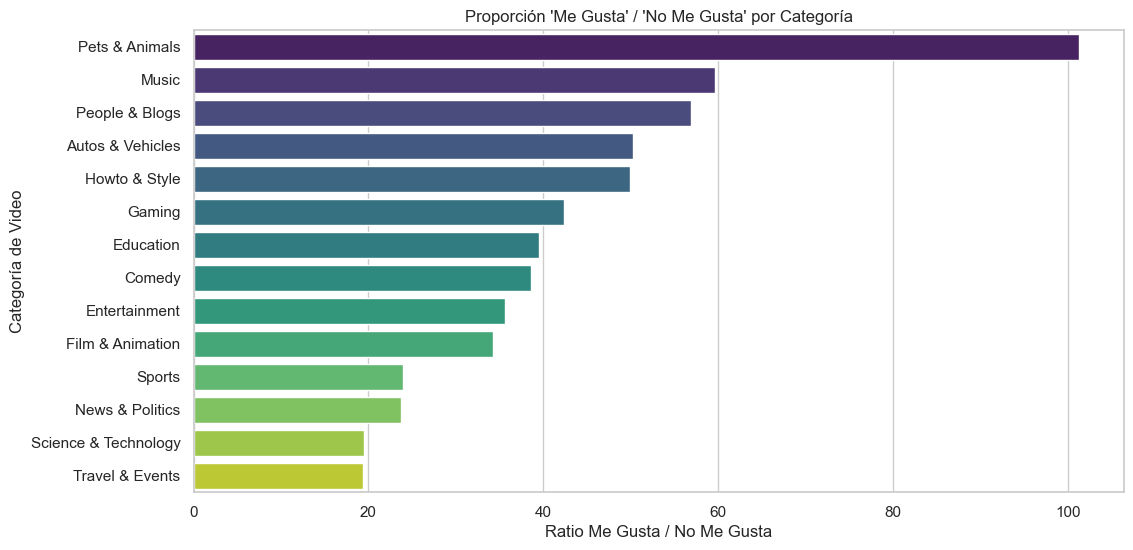

In [ ]:
df['like_dislike_ratio'] = df['likes'] / (df['dislikes'] + 1)  # +1 para evitar división por cero
# Calcular el ratio de likes/dislikes por categoría
like_dislike_ratio_by_category = df.groupby('category_name')['like_dislike_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=like_dislike_ratio_by_category.values, y=like_dislike_ratio_by_category.index, hue=like_dislike_ratio_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Proporción 'Me Gusta' / 'No Me Gusta' por Categoría")
plt.xlabel("Ratio Me Gusta / No Me Gusta")
plt.ylabel("Categoría de Video")
plt.show()

### 4. ¿Qué categorías de videos tienen la mejor proporción de “Vistas” / “Comentarios”?

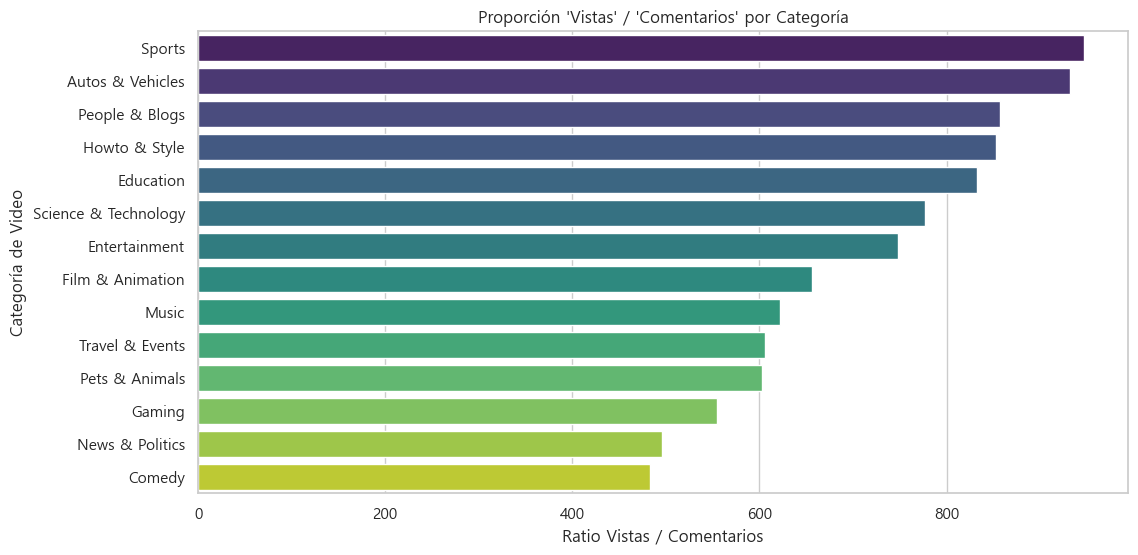

In [64]:
df['view_comment_ratio'] = df['views'] / (df['comment_count'] + 1)
# Calcular el ratio de views/comment_count por categoría
view_comment_ratio_by_category = df.groupby('category_name')['view_comment_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=view_comment_ratio_by_category.values, y=view_comment_ratio_by_category.index,hue=view_comment_ratio_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Proporción 'Vistas' / 'Comentarios' por Categoría")
plt.xlabel("Ratio Vistas / Comentarios")
plt.ylabel("Categoría de Video")
plt.show()

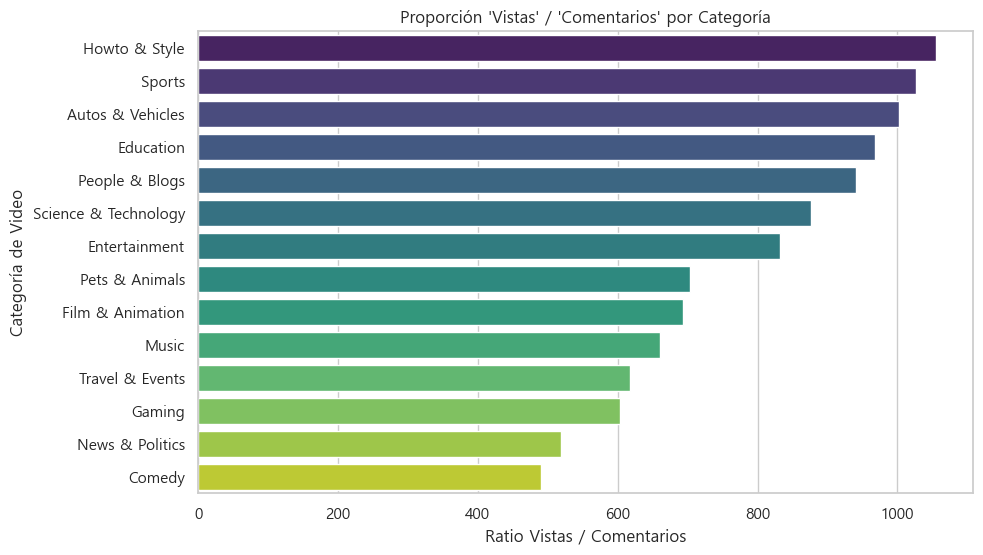

In [63]:
df = df[df['comment_count'] > 0]

# Calcular la proporción "Vistas/Comentarios" para cada video
df['views_comments_ratio'] = df['views'] / df['comment_count']

# Calcular el promedio de "Vistas/Comentarios" por categoría
avg_views_comments_ratio = df.groupby('category_name')['views_comments_ratio'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_views_comments_ratio, y=avg_views_comments_ratio.index, hue=avg_views_comments_ratio.index, dodge=False, palette="viridis", legend=False)
plt.title("Proporción 'Vistas' / 'Comentarios' por Categoría")
plt.xlabel("Ratio Vistas / Comentarios")
plt.ylabel("Categoría de Video")
plt.show()

### 5. ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

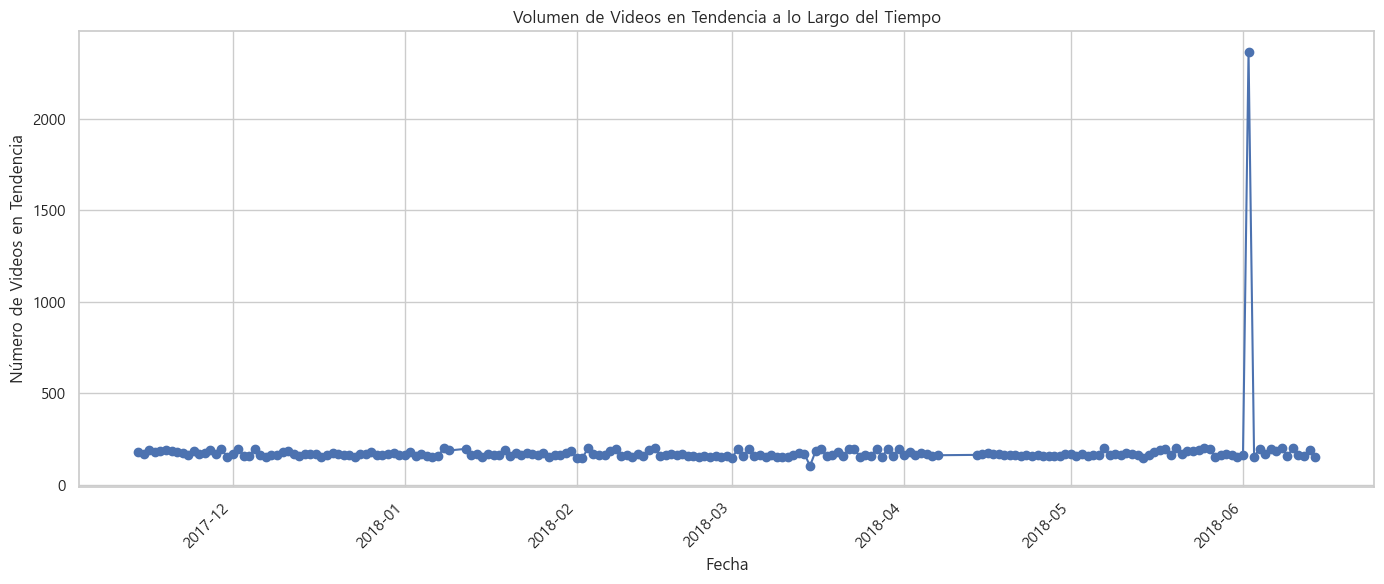

In [50]:
# Configurar la fuente para admitir caracteres coreanos
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False 

# Convertir la columna 'trending_date' a tipo datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce', format='%y.%d.%m')

# Contar la cantidad de videos en tendencia por fecha
videos_by_date = df.groupby('trending_date').size()

plt.figure(figsize=(14, 6))
videos_by_date.plot(kind='line', marker='o', color='b')
plt.title("Volumen de Videos en Tendencia a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de Videos en Tendencia")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A lo largo del tiempo, la cantidad de videos en tendencia parece mantenerse estable en un nivel bajo, con ligeras variaciones entre fechas.
Observamos un pico muy pronunciado alrededor de mayo o junio de 2018, donde el número de videos en tendencia subió drásticamente, seguido de una rápida caída a los niveles previos de estabilidad. Este pico podría deberse a un evento especial o lanzamiento de contenido altamente popular que generó una cantidad inusualmente alta de videos en tendencia.

In [68]:
from googletrans import Translator

may_june_2018_data = df[(df['trending_date'] >= '2018-05-01') & (df['trending_date'] <= '2018-06-30')]

top_trending_videos = may_june_2018_data['title'].value_counts().head(10)

translator = Translator()

top_trending_videos_translated = {title: translator.translate(title, src='ko', dest='es').text for title in top_trending_videos.index}

for title, freq in top_trending_videos.items():
    print(f"Título original: {title} | Traducción: {top_trending_videos_translated[title]} | Frecuencia: {freq}")

Título original: 브베 실시간 스트리밍 | Traducción: Transmisión VB real | Frecuencia: 2185
Título original: MBC 예능 뜻밖의 Q 장삐쭈 방송분 | Traducción: MBC Entertainment inesperado Q | Frecuencia: 9
Título original: 나경원 의원실 비서 욕설 녹취록 추가 공개 | Traducción: Na Kyung -won, miembro del secretario del Secretario Parlamentario, divulgación adicional | Frecuencia: 9
Título original: 김어준의 다스 뵈이다 18회 MB근황 + 지방선거 | Traducción: Kim Eo -J Darth Snicks Episodio 18 MB + elecciones locales | Frecuencia: 9
Título original: 회장님의 부귀영화 [FULL] -Booyoung Chairman Corruption-18/05/15-MBC PD수첩 1155회 | Traducción: Presidente del Presidente de la película [Full] -Booyung Presidente Corruption-18/05/15-MBC PD Notebook Episodio 1155 | Frecuencia: 9
Título original: 남자 BJ들한테 자기야~♥ 우리집에 올래? 했더니 반응이.. - 이설 | Traducción: Los hombres BJS son para mí ~ ♥ ¿Te gustaría venir a mi casa?Después de hacerlo, la reacción ..- Lee Seol | Frecuencia: 8
Título original: 시청자제보로 18년만에 선생님 찾았습니다ㅠㅠ!!! | Traducción: Encontré un maestro en 18 años con lo

Streaming en Vivo de Juegos o Contenido Específico (브베 실시간 스트리밍): Este título aparece con una frecuencia significativamente alta, lo cual sugiere que algún evento de transmisión en vivo, probablemente relacionado con un juego o un fenómeno viral, pudo haber captado mucho interés.

Investigaciones y Escándalos:

"Booyoung Chairman Corruption" (회장님의 부귀영화): Un episodio de MBC PD수첩 (PD Notebook) que trata sobre la corrupción de un presidente de empresa tuvo una alta frecuencia en la lista de videos en tendencia.
"Grabar de insultos de un asistente de la oficina de un congresista" (나경원 의원실 비서 욕설 녹취록 추가 공개): Otro video que parece estar relacionado con una controversia política.
BTS (방탄소년단):

Videos relacionados con el grupo BTS, especialmente el lanzamiento del video musical "FAKE LOVE" y su presentación en los Billboard, están en la lista de los más vistos. Esto refleja el enorme interés global y nacional en el grupo durante este período.
Películas y Cultura Popular:

"Deadpool 2": Un video sobre las escenas post-créditos de Deadpool 2 también fue muy popular, indicando interés en el lanzamiento de esta película en Corea del Sur.
Problemas Sociales y Políticos:

Contenido relacionado con Kim Eo-jun y otros comentarios políticos atrajeron atención, lo cual es común en Corea del Sur, donde los videos de contenido político o social pueden volverse virales rápidamente.

### 6. ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

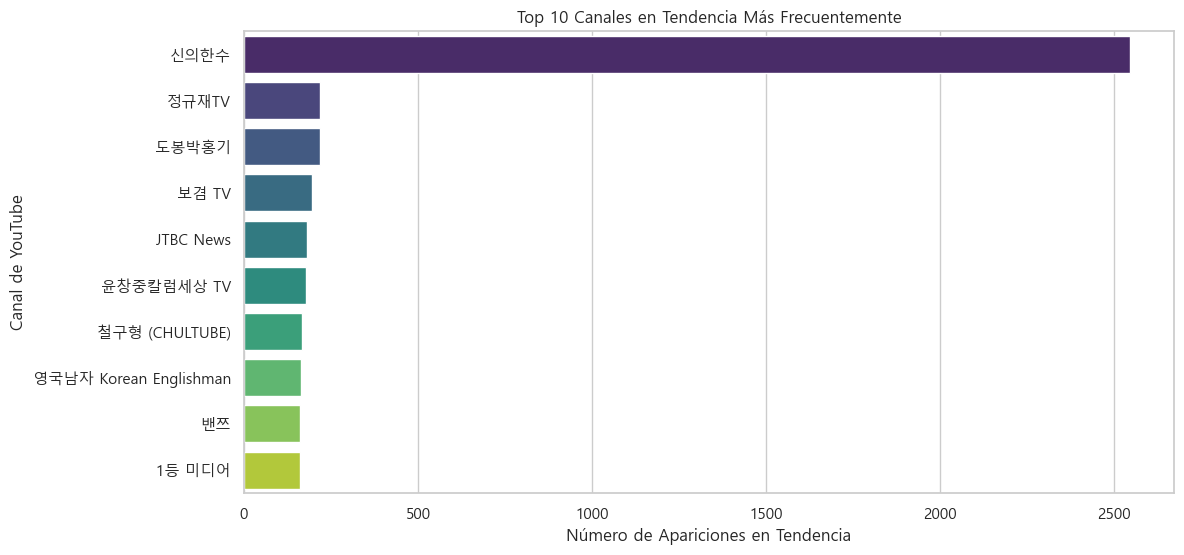

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 272 (\N{LATIN CAPITAL LETTER D WITH STROKE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24417 (\N{CJK UNIFIED IDEOGRAPH-5F61}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


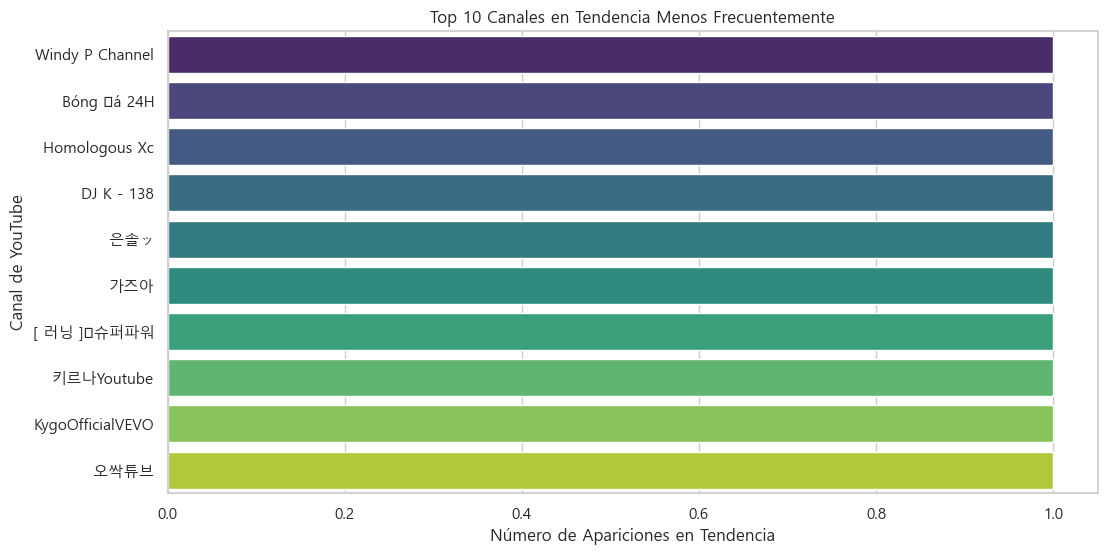

In [51]:
# Contar la frecuencia de cada canal en la columna 'channel_title'
channel_trending_count = df['channel_title'].value_counts()

# Seleccionar los top 10 canales más y menos frecuentemente en tendencia
top_trending_channels = channel_trending_count.head(10)
least_trending_channels = channel_trending_count.tail(10)

# Configurar el gráfico para los canales más frecuentemente en tendencia
plt.figure(figsize=(12, 6))
sns.barplot(x=top_trending_channels.values, y=top_trending_channels.index, hue=top_trending_channels.index, dodge=False, palette="viridis", legend=False)
plt.title("Top 10 Canales en Tendencia Más Frecuentemente")
plt.xlabel("Número de Apariciones en Tendencia")
plt.ylabel("Canal de YouTube")
plt.show()

# Configurar el gráfico para los canales menos frecuentemente en tendencia
plt.figure(figsize=(12, 6))
sns.barplot(x=least_trending_channels.values, y=least_trending_channels.index, hue=least_trending_channels.index, dodge=False, palette="viridis", legend=False)
plt.title("Top 10 Canales en Tendencia Menos Frecuentemente")
plt.xlabel("Número de Apariciones en Tendencia")
plt.ylabel("Canal de YouTube")
plt.show()


### 7. ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

In [26]:
import geopandas as gpd
import geodatasets
from shapely.geometry import Point

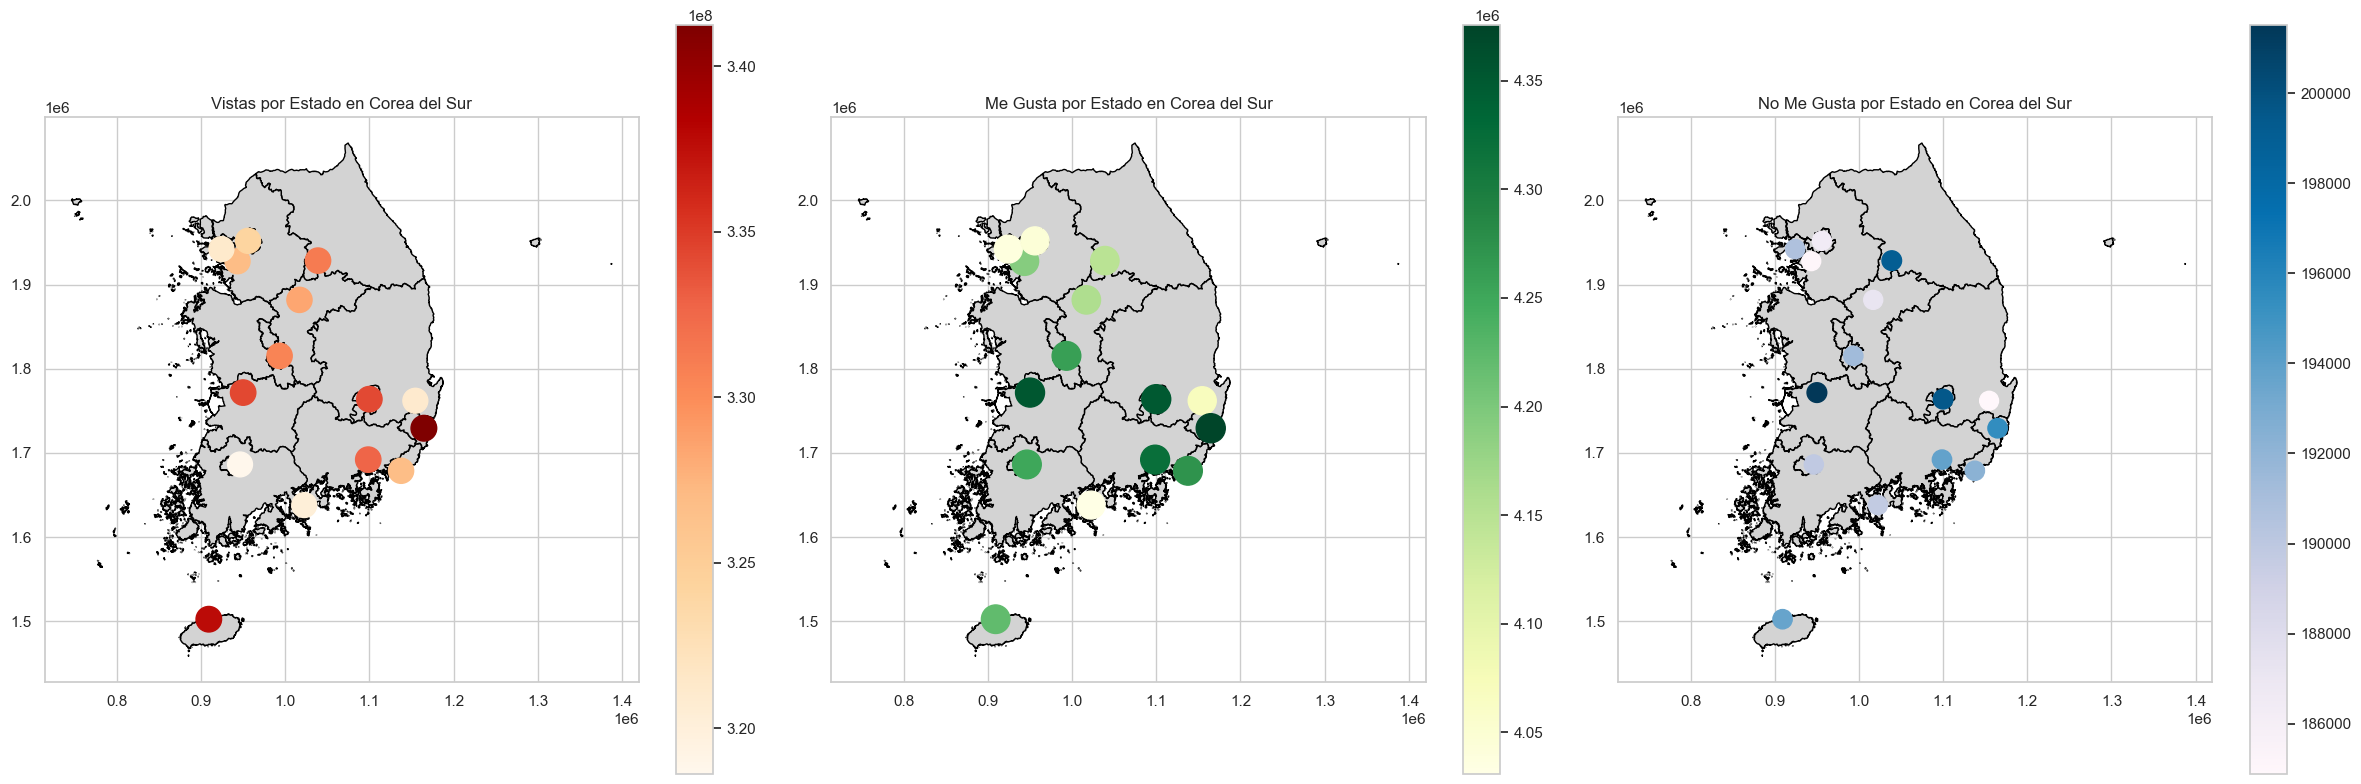

In [ ]:
"""estado_agrupado = df.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
}).reset_index()
gdf = gpd.GeoDataFrame(estado_agrupado, geometry=gpd.GeoSeries.from_wkt(df['geometry']))"""
estado_agrupado = df.groupby('state').agg({
    'views': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'lat': 'first', 
    'lon': 'first'
}).reset_index()

# Crear la columna 'geometry' con los puntos geográficos
estado_agrupado['geometry'] = estado_agrupado.apply(lambda x: Point((x['lon'], x['lat'])), axis=1)

# Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(estado_agrupado, geometry='geometry')
gdf = gdf.set_crs("EPSG:4326")  # Aseguramos que está en el sistema de coordenadas adecuado

# Convertir a CRS proyectado para una visualización precisa
gdf = gdf.to_crs("EPSG:5179")

# Cargar el shapefile de Corea del Sur con divisiones administrativas como fondo del mapa
admin_gdf = gpd.read_file('../data/KR_Mapa/gadm41_KOR_1.shp')
admin_gdf = admin_gdf.to_crs("EPSG:5179")

# Configuración de la figura para el mapa
fig, ax = plt.subplots(1, 3, figsize=(24, 8))

# Fondo de Corea del Sur y superposición de los datos de "Vistas"
admin_gdf.plot(ax=ax[0], color='lightgrey', edgecolor='black')
gdf.plot(column='views', cmap='OrRd', legend=True, ax=ax[0], markersize=gdf['views'] / 1000000)
ax[0].set_title('Vistas por Estado en Corea del Sur')

# Fondo de Corea del Sur y superposición de los datos de "Me gusta"
admin_gdf.plot(ax=ax[1], color='lightgrey', edgecolor='black')
gdf.plot(column='likes', cmap='YlGn', legend=True, ax=ax[1], markersize=gdf['likes'] / 10000)
ax[1].set_title('Me Gusta por Estado en Corea del Sur')

# Fondo de Corea del Sur y superposición de los datos de "No me gusta"
admin_gdf.plot(ax=ax[2], color='lightgrey', edgecolor='black')
gdf.plot(column='dislikes', cmap='PuBu', legend=True, ax=ax[2], markersize=gdf['dislikes'] / 1000)
ax[2].set_title('No Me Gusta por Estado en Corea del Sur')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [32]:
estado_agrupado = estado_agrupado.sort_values(by='views', ascending=False)

print("Estados con sus respectivas cantidades de Vistas, Me gusta y No me gusta:")
print(estado_agrupado)

Estados con sus respectivas cantidades de Vistas, Me gusta y No me gusta:
                 state        views      likes  dislikes
14               Ulsan  341241227.0  4375555.0  195410.0
9                 Jeju  337736593.0  4221356.0  193617.0
10        Jeollabuk Do  334292796.0  4353040.0  201507.0
13    Taegu Gwangyoksi  334192877.0  4349998.0  199527.0
7     Gyeongsangnam Do  332719959.0  4320401.0  193774.0
4           Gangwon Do  331246634.0  4147298.0  199099.0
3              Daejeon  330564170.0  4258476.0  191321.0
1    Chungcheongbuk Do  328343815.0  4158618.0  187211.0
6          Gyeonggi Do  326908487.0  4192403.0  185025.0
0                Busan  326756416.0  4272880.0  192245.0
12              Seoul   324100747.0  4044681.0  186380.0
8   Inch'on Gwangyoksi  321105113.0  4038406.0  190712.0
2                Daegu  321022787.0  4069707.0  184883.0
5              Gwangju  320242311.0  4030875.0  189732.0
11  Kwangju Gwangyoksi  318616554.0  4251415.0  189859.0


In [ ]:
estado_mayor_vistas = estado_agrupado.sort_values(by='views', ascending=False).head(1)
estado_mayor_likes = estado_agrupado.sort_values(by='likes', ascending=False).head(1)
estado_mayor_dislikes = estado_agrupado.sort_values(by='dislikes', ascending=False).head(1)

print("Estado con el mayor número de Vistas:")
print(estado_mayor_vistas[['state', 'views']])

print("\nEstado con el mayor número de Me gusta:")
print(estado_mayor_likes[['state', 'likes']])

print("\nEstado con el mayor número de No me gusta:")
print(estado_mayor_dislikes[['state', 'dislikes']])

Estado con el mayor número de Vistas:
    state        views
14  Ulsan  341241227.0

Estado con el mayor número de Me gusta:
    state      likes
14  Ulsan  4375555.0

Estado con el mayor número de No me gusta:
           state  dislikes
10  Jeollabuk Do  201507.0


### 8. ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

In [52]:
avg_likes_trending = df['likes'].mean()
avg_dislikes_trending = df['dislikes'].mean()

# Mostrar los resultados
print("Promedio de 'Me Gusta' en Videos en Tendencia:", avg_likes_trending)
print("Promedio de 'No Me Gusta' en Videos en Tendencia:", avg_dislikes_trending)

# Evaluar si los videos en tendencia tienen más 'Me Gusta' que 'No Me Gusta'
if avg_likes_trending > avg_dislikes_trending:
    print("Los videos en tendencia suelen recibir una mayor cantidad de comentarios positivos ('Me Gusta').")
else:
    print("Los videos en tendencia no suelen recibir una mayor cantidad de comentarios positivos ('Me Gusta').")

Promedio de 'Me Gusta' en Videos en Tendencia: 1709.7625552212917
Promedio de 'No Me Gusta' en Videos en Tendencia: 78.06331138032903
Los videos en tendencia suelen recibir una mayor cantidad de comentarios positivos ('Me Gusta').


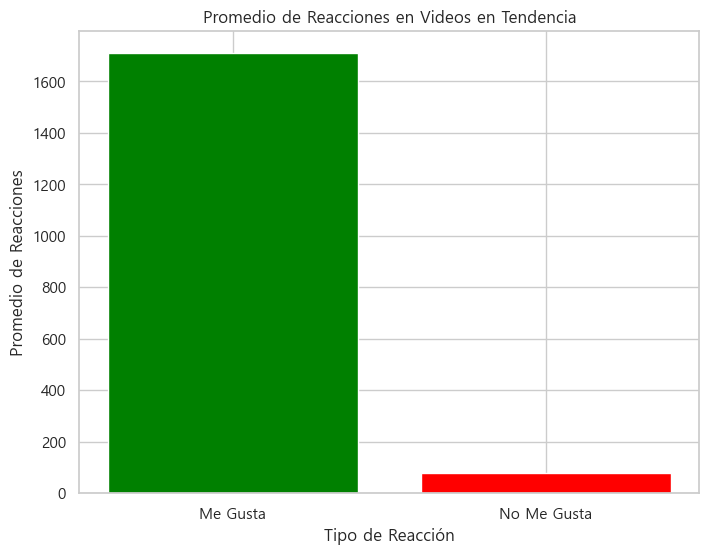

In [ ]:
metrics = ['Me Gusta', 'No Me Gusta']
averages = [avg_likes_trending, avg_dislikes_trending]

plt.figure(figsize=(8, 6))
plt.bar(metrics, averages, color=['green', 'red'])
plt.title("Promedio de Reacciones en Videos en Tendencia")
plt.xlabel("Tipo de Reacción")
plt.ylabel("Promedio de Reacciones")
plt.show()

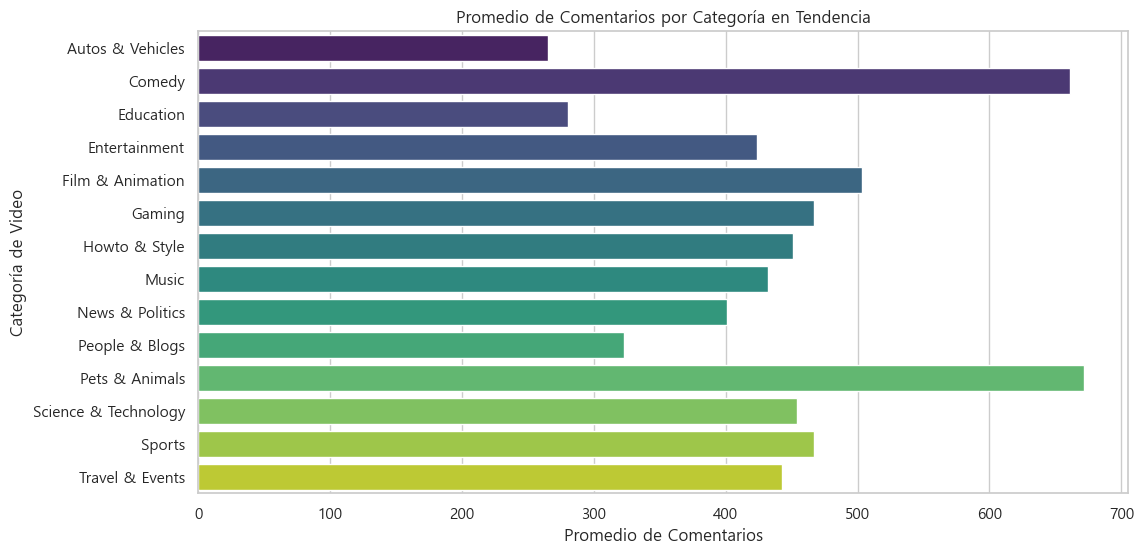

In [54]:
comments_by_category = df.groupby('category_name')['comment_count'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=comments_by_category.values, y=comments_by_category.index, hue=comments_by_category.index, dodge=False, palette="viridis", legend=False)
plt.title("Promedio de Comentarios por Categoría en Tendencia")
plt.xlabel("Promedio de Comentarios")
plt.ylabel("Categoría de Video")
plt.show()


### 9. ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

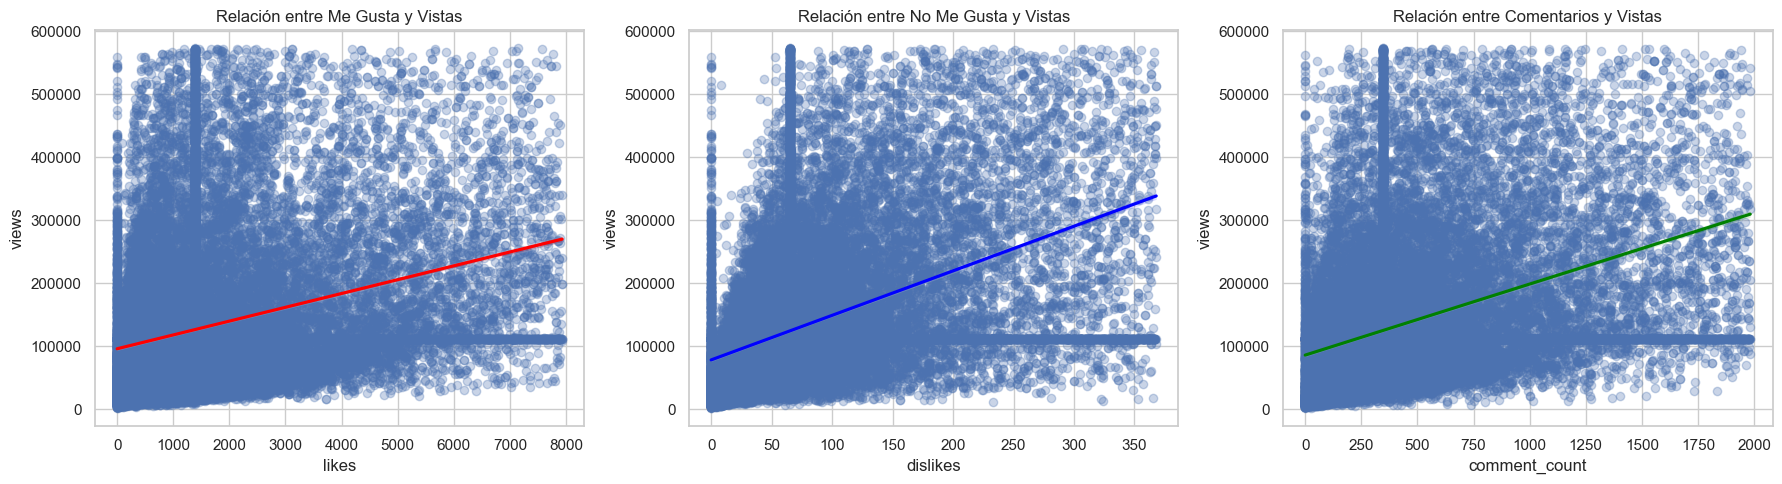

In [29]:
plt.figure(figsize=(18, 5))

# Relación entre Me Gusta y Vistas
plt.subplot(1, 3, 1)
sns.regplot(x='likes', y='views', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title("Relación entre Me Gusta y Vistas")

# Relación entre No Me Gusta y Vistas
plt.subplot(1, 3, 2)
sns.regplot(x='dislikes', y='views', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "blue"})
plt.title("Relación entre No Me Gusta y Vistas")

# Relación entre Comentarios y Vistas
plt.subplot(1, 3, 3)
sns.regplot(x='comment_count', y='views', data=df, scatter_kws={'alpha':0.3}, line_kws={"color": "green"})
plt.title("Relación entre Comentarios y Vistas")

plt.tight_layout()
plt.show()
